In [12]:
import random
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [13]:
x =np.array([
    [12.9, 11.4], [13.7, 8.3],  [15.6, 10.6], [11.0, 11.6], [12.7, 13.8],    [13.2, 11.8], [12.3, 11.7], [11.5, 14.7], [11.7, 11.2], [10.7, 9.3], 
    [12.6, 11.8], [10.1, 9.7],  [16.9, 9.8],  [13.4, 9.0],  [14.2, 17.0],    [17.2, 12.0], [12.2, 13.9], [14.4, 15.5], [12.2, 11.8], [10.6, 14.2], 
    [15.5, 15.4], [7.7, 9.8],   [9.6, 13.2],  [10.8, 12.2], [11.9, 13.0],    [10.7, 13.6], [9.0, 14.3],  [9.4, 15.0],  [14.7, 11.9], [14.7, 9.2],
    [14.8, 10.6], [16.2, 13.3], [14.3, 14.7], [12.6, 11.3], [16.2, 15.0],    [15.9, 11.9], [13.8, 15.0], [10.1, 7.8],  [11.9, 17.4], [8.8, 14.4],
    [15.6, 13.9], [14.6, 15.0], [11.6, 12.4], [15.7, 9.9],  [10.5, 12.2],    [12.1, 12.6], [12.5, 13.2], [9.8, 10.1],  [8.0, 13.6],  [14.0, 14.2],
    [13.1, 11.3], [15.0, 14.2], [13.0, 7.8],  [14.6, 12.1], [10.5, 13.9],    [9.0, 7.9],   [12.7, 8.9],  [13.5, 10.9], [12.8, 14.3], [10.1, 16.3], 
    [13.7, 16.8], [7.5, 11.5],  [12.0, 11.5], [14.7, 12.0], [12.1, 11.7],    [9.7, 9.6],   [10.2, 13.5], [14.1, 13.1], [10.4, 10.6], [12.5, 15.5], 
    [17.5, 11.0], [11.8, 7.8],  [11.6, 17.5], [8.9, 8.0],   [13.8, 12.4],    [10.1, 10.2], [14.2, 10.0], [13.6, 9.7],  [8.1, 15.0],  [8.3, 15.5], 
    [9.2, 9.5],   [16.5, 12.9], [11.4, 12.8], [12.0, 13.1], [12.9, 12.0],    [11.6, 11.9], [12.0, 11.2], [13.6, 16.6], [10.3, 14.2], [12.5, 13.0], 
    [8.9, 8.6],   [12.7, 6.7],  [10.3, 14.1], [11.6, 11.7], [12.3, 15.0],    [12.6, 12.3], [15.0, 10.5], [15.9, 10.8], [11.2, 8.1],  [10.4, 13.8],
    [8.6, 15.4],  [7.6, 5.0],   [6.2, 12.5],  [5.5, 7.2],   [16.2, 7.3],     [17.1, 10.3], [8.8, 7.7],   [4.9, 16.7],  [12.8, 5.8],  [10.0, 4.3],
    [4.8, 13.8],  [17.9, 11.9], [3.7, 12.8],  [16.2, 20.2], [16.6, 8.5],     [17.2, 8.9],  [7.9, 9.4],   [11.7, 17.1], [12.7, 19.0], [13.0, 6.3], 
    [11.3, 17.6], [18.5, 8.2],  [20.0, 13.5], [13.1, 17.6], [10.6, 18.4],    [8.1, 15.4],  [16.7, 16.7], [9.6, 7.6],   [8.4, 17.4],  [12.5, 18.3], 
    [17.1, 17.4], [4.0, 13.3],  [17.4, 9.6],  [6.3, 14.8],  [7.2, 9.9],      [17.1, 12.1], [13.4, 19.7], [5.9, 12.0],  [13.3, 17.1], [14.8, 20.1], 
    [9.5, 3.5],   [12.1, 6.6],  [16.2, 4.1],  [15.6, 20.8], [4.5, 17.9],     [9.3, 16.8],  [5.5, 14.7],  [21.4, 10.8], [7.8, 13.8],  [17.6, 9.6], 
    [15.7, 18.7], [5.9, 5.3],   [5.0, 7.9],   [21.4, 14.7], [3.1, 12.2],     [14.3, 6.3],  [16.2, 16.3], [11.3, 20.3], [7.5, 12.7],  [17.9, 11.2], 
    [8.5, 5.1],   [7.5, 4.5],   [15.2, 19.2], [14.3, 6.6],  [18.9, 5.4],     [7.9, 15.7],  [11.0, 3.9],  [17.5, 13.8], [13.9, 8.0],  [4.0, 14.3], 
    [14.7, 17.5], [20.2, 14.5], [9.3, 17.9],  [8.8, 9.3],   [17.0, 7.0],     [14.8, 8.5],  [5.6, 17.5],  [8.3, 5.4],   [14.6, 8.2],  [12.0, 5.9], 
    [4.5, 9.9],   [15.2, 7.1],  [16.5, 7.3],  [12.7, 19.0], [12.5, 17.3],    [8.1, 10.4],  [4.1, 10.1],  [11.7, 16.6], [10.3, 17.9], [19.2, 9.7], 
    [6.0, 7.1],   [17.6, 15.2], [17.0, 10.9], [16.4, 19.0], [7.9, 17.9],     [7.5, 9.3],   [4.8, 14.4],  [7.4, 14.5],  [9.2, 3.6],   [15.9, 19.0]
])
 
y = np.array([
    1, 1, 1, 1, 1,     1, 1, 1, 1, 1, 
    1, 1, 1, 1, 1,     1, 1, 1, 1, 1, 
    1, 1, 1, 1, 1,     1, 1, 1, 1, 1, 
    1, 1, 1, 1, 1,     1, 1, 1, 1, 1, 
    1, 1, 1, 1, 1,     1, 1, 1, 1, 1, 
    1, 1, 1, 1, 1,     1, 1, 1, 1, 1, 
    1, 1, 1, 1, 1,     1, 1, 1, 1, 1, 
    1, 1, 1, 1, 1,     1, 1, 1, 1, 1, 
    1, 1, 1, 1, 1,     1, 1, 1, 1, 1, 
    1, 1, 1, 1, 1,     1, 1, 1, 1, 1,    
    0, 0, 0, 0, 0,     0, 0, 0, 0, 0, 
    0, 0, 0, 0, 0,     0, 0, 0, 0, 0, 
    0, 0, 0, 0, 0,     0, 0, 0, 0, 0, 
    0, 0, 0, 0, 0,     0, 0, 0, 0, 0, 
    0, 0, 0, 0, 0,     0, 0, 0, 0, 0, 
    0, 0, 0, 0, 0,     0, 0, 0, 0, 0, 
    0, 0, 0, 0, 0,     0, 0, 0, 0, 0, 
    0, 0, 0, 0, 0,     0, 0, 0, 0, 0, 
    0, 0, 0, 0, 0,     0, 0, 0, 0, 0, 
    0, 0, 0, 0, 0,     0, 0, 0, 0, 0
 
])

In [14]:
def compile_model(neuronas_capa_1,neuronas_capa_2,neuronas_capa_3,neuronas_capa_4):
    random.seed(5) 
    np.random.seed(5)
    tf.random.set_seed(5)
    model=Sequential()
    model.add(Dense(neuronas_capa_1, activation='relu',input_dim=2))
    model.add(Dense(neuronas_capa_2, activation='relu'))
    model.add(Dense(neuronas_capa_3, activation='relu'))
    model.add(Dense(neuronas_capa_4, activation='sigmoid'))
    model.compile(loss='binary_crossentropy')
 
    return model

In [15]:
def plot_result(model,x,y,figure,title,filas,columns,index):
    axes = figure.add_subplot(filas,columns,index)
    axes.set_title(title, fontsize=14,pad=30,color="#003B80")
     
    colors = ["#0E5581", "#8F0C00"] 
    cmap = ListedColormap(colors[:len(np.unique(y))]) 
 
 
    colors = ["#83B5F1", "#FF8175"] 
    cmap_fondo = ListedColormap(colors[:len(np.unique(y))]) 
 
    xt=np.linspace(0,22,400)
    yt=np.linspace(0,22,400)
    xt,yt=np.meshgrid(xt,yt)
 
    xa=xt.reshape(-1)
    ya=yt.reshape(-1)
 
    xya=np.column_stack((xa,ya))
 
    pred = model.predict(xya, verbose=False)
    za = (pred > 0.5).astype(int).ravel()
 
    zt=np.reshape(za,xt.shape)
 
 
    scatter=axes.scatter(x=xa, y=ya, c=za, cmap=cmap_fondo,s=6)
    axes.set_xlabel('Posición del elemento en el eje X')  
    axes.set_ylabel('Posición del elemento en el eje Y')
 
    for i, name in enumerate(['No metal',"Metal"]):
        color = scatter.cmap(scatter.norm(i)) 
        axes.scatter([], [], color=[color], label=name+":"+str(i))  
    scatter=axes.scatter(x=x[:,0], y=x[:,1], c=y, cmap=cmap,s=6)
    axes.set_xlim(xmin=0,xmax=22)
    axes.set_ylim(ymin=0,ymax=22)
    axes.legend(title="Elemento")

/opt/miniconda3/envs/pia/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


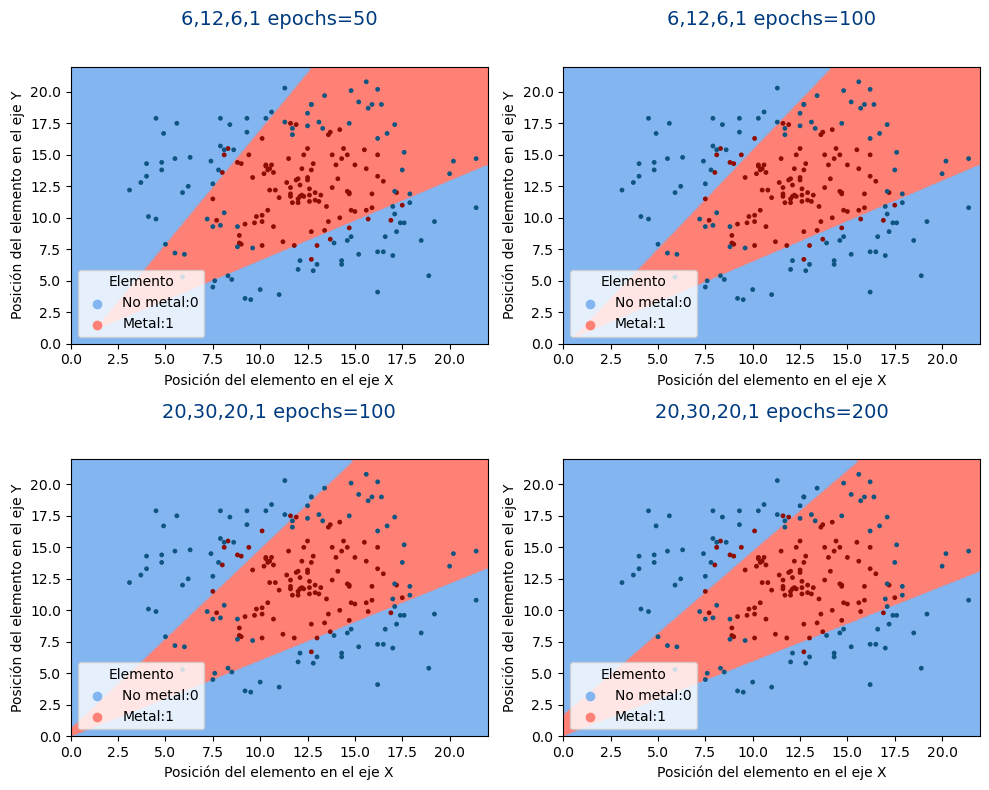

In [16]:
figure=plt.figure(figsize = (10, 8))
 
 
 
model=compile_model(6,12,6,1)
 
model.fit(x, y,epochs=50,verbose=False) 
plot_result(model,x,y,figure,"6,12,6,1 epochs=50",2,2,1)
 
model.fit(x, y,epochs=50,verbose=False) 
plot_result(model,x,y,figure,"6,12,6,1 epochs=100",2,2,2)
 
 
 
 
model=compile_model(20,30,20,1)
 
model.fit(x, y,epochs=100,verbose=False) 
plot_result(model,x,y,figure,"20,30,20,1 epochs=100",2,2,3)
 
model.fit(x, y,epochs=100,verbose=False) 
plot_result(model,x,y,figure,"20,30,20,1 epochs=200",2,2,4)
 
 
 
 
 
figure.tight_layout()

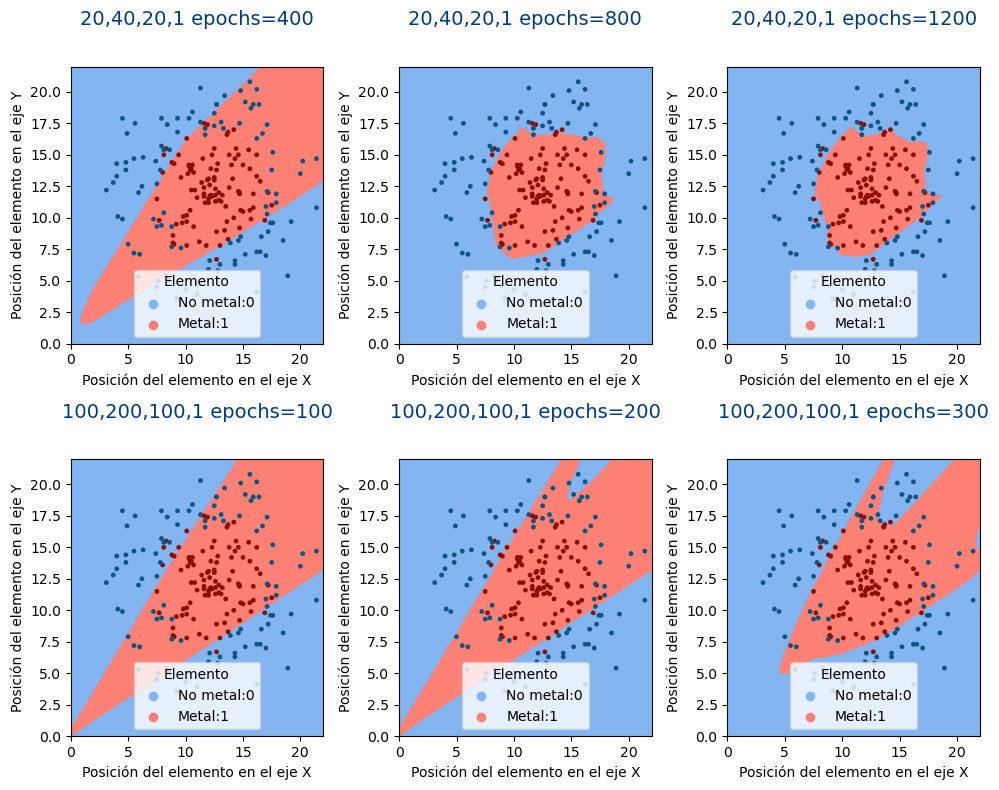

In [17]:
figure=plt.figure(figsize = (10, 8))
 
 
 
model=compile_model(20,40,20,1)
 
model.fit(x, y,epochs=400,verbose=False) 
plot_result(model,x,y,figure,"20,40,20,1 epochs=400",2,3,1)
 
model.fit(x, y,epochs=400,verbose=False) 
plot_result(model,x,y,figure,"20,40,20,1 epochs=800",2,3,2)

model.fit(x, y,epochs=400,verbose=False) 
plot_result(model,x,y,figure,"20,40,20,1 epochs=1200",2,3,3)

 
 
model=compile_model(100,200,100,1)
 
model.fit(x, y,epochs=100,verbose=False) 
plot_result(model,x,y,figure,"100,200,100,1 epochs=100",2,3,4)

model.fit(x, y,epochs=100,verbose=False) 
plot_result(model,x,y,figure,"100,200,100,1 epochs=200",2,3,5)

model.fit(x, y,epochs=100,verbose=False) 
plot_result(model,x,y,figure,"100,200,100,1 epochs=300",2,3,6)
 
 
 
 
 
figure.tight_layout()

In [18]:
print(model.predict(np.array([[13.1,17.6],[3.7,12.8]])))

# y_score = 0,56, y_pred = 1, y_true = 0
# y_score = 0,00, y_pred = 0, y_true = 0

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
[[5.0786382e-01]
 [1.9946687e-04]]


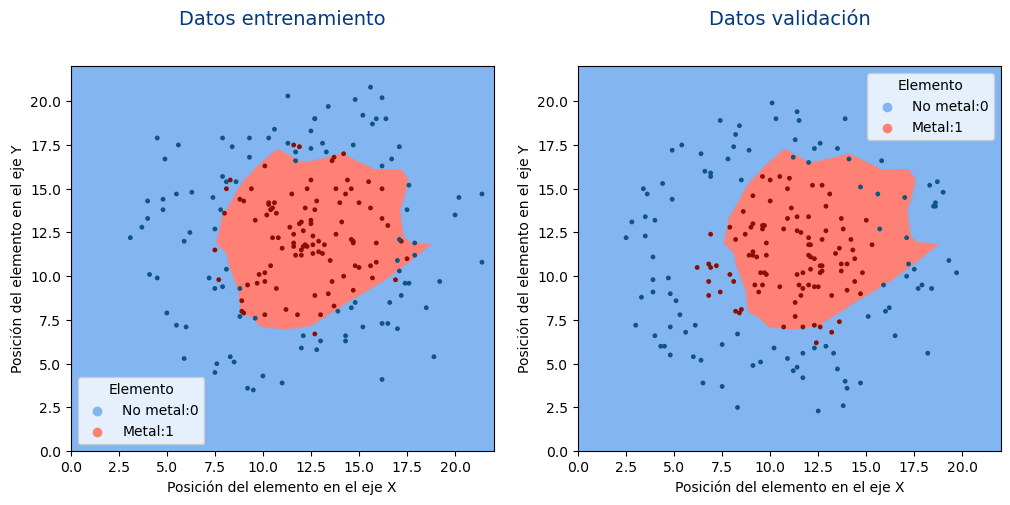

In [19]:
x_entrenamiento =np.array([
    [12.9, 11.4], [13.7, 8.3],  [15.6, 10.6], [11.0, 11.6], [12.7, 13.8],    [13.2, 11.8], [12.3, 11.7], [11.5, 14.7], [11.7, 11.2], [10.7, 9.3], 
    [12.6, 11.8], [10.1, 9.7],  [16.9, 9.8],  [13.4, 9.0],  [14.2, 17.0],    [17.2, 12.0], [12.2, 13.9], [14.4, 15.5], [12.2, 11.8], [10.6, 14.2], 
    [15.5, 15.4], [7.7, 9.8],   [9.6, 13.2],  [10.8, 12.2], [11.9, 13.0],    [10.7, 13.6], [9.0, 14.3],  [9.4, 15.0],  [14.7, 11.9], [14.7, 9.2],
    [14.8, 10.6], [16.2, 13.3], [14.3, 14.7], [12.6, 11.3], [16.2, 15.0],    [15.9, 11.9], [13.8, 15.0], [10.1, 7.8],  [11.9, 17.4], [8.8, 14.4],
    [15.6, 13.9], [14.6, 15.0], [11.6, 12.4], [15.7, 9.9],  [10.5, 12.2],    [12.1, 12.6], [12.5, 13.2], [9.8, 10.1],  [8.0, 13.6],  [14.0, 14.2],
    [13.1, 11.3], [15.0, 14.2], [13.0, 7.8],  [14.6, 12.1], [10.5, 13.9],    [9.0, 7.9],   [12.7, 8.9],  [13.5, 10.9], [12.8, 14.3], [10.1, 16.3], 
    [13.7, 16.8], [7.5, 11.5],  [12.0, 11.5], [14.7, 12.0], [12.1, 11.7],    [9.7, 9.6],   [10.2, 13.5], [14.1, 13.1], [10.4, 10.6], [12.5, 15.5], 
    [17.5, 11.0], [11.8, 7.8],  [11.6, 17.5], [8.9, 8.0],   [13.8, 12.4],    [10.1, 10.2], [14.2, 10.0], [13.6, 9.7],  [8.1, 15.0],  [8.3, 15.5], 
    [9.2, 9.5],   [16.5, 12.9], [11.4, 12.8], [12.0, 13.1], [12.9, 12.0],    [11.6, 11.9], [12.0, 11.2], [13.6, 16.6], [10.3, 14.2], [12.5, 13.0], 
    [8.9, 8.6],   [12.7, 6.7],  [10.3, 14.1], [11.6, 11.7], [12.3, 15.0],    [12.6, 12.3], [15.0, 10.5], [15.9, 10.8], [11.2, 8.1],  [10.4, 13.8],
    [8.6, 15.4],  [7.6, 5.0],   [6.2, 12.5],  [5.5, 7.2],   [16.2, 7.3],     [17.1, 10.3], [8.8, 7.7],   [4.9, 16.7],  [12.8, 5.8],  [10.0, 4.3],
    [4.8, 13.8],  [17.9, 11.9], [3.7, 12.8],  [16.2, 20.2], [16.6, 8.5],     [17.2, 8.9],  [7.9, 9.4],   [11.7, 17.1], [12.7, 19.0], [13.0, 6.3], 
    [11.3, 17.6], [18.5, 8.2],  [20.0, 13.5], [13.1, 17.6], [10.6, 18.4],    [8.1, 15.4],  [16.7, 16.7], [9.6, 7.6],   [8.4, 17.4],  [12.5, 18.3], 
    [17.1, 17.4], [4.0, 13.3],  [17.4, 9.6],  [6.3, 14.8],  [7.2, 9.9],      [17.1, 12.1], [13.4, 19.7], [5.9, 12.0],  [13.3, 17.1], [14.8, 20.1], 
    [9.5, 3.5],   [12.1, 6.6],  [16.2, 4.1],  [15.6, 20.8], [4.5, 17.9],     [9.3, 16.8],  [5.5, 14.7],  [21.4, 10.8], [7.8, 13.8],  [17.6, 9.6], 
    [15.7, 18.7], [5.9, 5.3],   [5.0, 7.9],   [21.4, 14.7], [3.1, 12.2],     [14.3, 6.3],  [16.2, 16.3], [11.3, 20.3], [7.5, 12.7],  [17.9, 11.2], 
    [8.5, 5.1],   [7.5, 4.5],   [15.2, 19.2], [14.3, 6.6],  [18.9, 5.4],     [7.9, 15.7],  [11.0, 3.9],  [17.5, 13.8], [13.9, 8.0],  [4.0, 14.3], 
    [14.7, 17.5], [20.2, 14.5], [9.3, 17.9],  [8.8, 9.3],   [17.0, 7.0],     [14.8, 8.5],  [5.6, 17.5],  [8.3, 5.4],   [14.6, 8.2],  [12.0, 5.9], 
    [4.5, 9.9],   [15.2, 7.1],  [16.5, 7.3],  [12.7, 19.0], [12.5, 17.3],    [8.1, 10.4],  [4.1, 10.1],  [11.7, 16.6], [10.3, 17.9], [19.2, 9.7], 
    [6.0, 7.1],   [17.6, 15.2], [17.0, 10.9], [16.4, 19.0], [7.9, 17.9],     [7.5, 9.3],   [4.8, 14.4],  [7.4, 14.5],  [9.2, 3.6],   [15.9, 19.0]
])
 
y_entrenamiento = np.array([
    1, 1, 1, 1, 1,     1, 1, 1, 1, 1, 
    1, 1, 1, 1, 1,     1, 1, 1, 1, 1, 
    1, 1, 1, 1, 1,     1, 1, 1, 1, 1, 
    1, 1, 1, 1, 1,     1, 1, 1, 1, 1, 
    1, 1, 1, 1, 1,     1, 1, 1, 1, 1, 
    1, 1, 1, 1, 1,     1, 1, 1, 1, 1, 
    1, 1, 1, 1, 1,     1, 1, 1, 1, 1, 
    1, 1, 1, 1, 1,     1, 1, 1, 1, 1, 
    1, 1, 1, 1, 1,     1, 1, 1, 1, 1, 
    1, 1, 1, 1, 1,     1, 1, 1, 1, 1,    
    0, 0, 0, 0, 0,     0, 0, 0, 0, 0, 
    0, 0, 0, 0, 0,     0, 0, 0, 0, 0, 
    0, 0, 0, 0, 0,     0, 0, 0, 0, 0, 
    0, 0, 0, 0, 0,     0, 0, 0, 0, 0, 
    0, 0, 0, 0, 0,     0, 0, 0, 0, 0, 
    0, 0, 0, 0, 0,     0, 0, 0, 0, 0, 
    0, 0, 0, 0, 0,     0, 0, 0, 0, 0, 
    0, 0, 0, 0, 0,     0, 0, 0, 0, 0, 
    0, 0, 0, 0, 0,     0, 0, 0, 0, 0, 
    0, 0, 0, 0, 0,     0, 0, 0, 0, 0
 
])
 
x_validacion = np.array([
        [11.4, 13.4], [11.7, 10.2], [11.4, 12.6], [12.1, 10.4], [8.9, 11.2],         [9.2, 9.5],   [11.3, 7.7],  [6.9, 10.5],  [10.0, 14.3], [11.6, 12.5], 
        [15.0, 13.2], [10.7, 7.1],  [8.2, 12.1],  [12.9, 14.0], [13.2, 8.9],         [10.7, 12.7], [7.9, 12.8],  [9.6, 15.7],  [8.2, 8.0],   [9.5, 10.2], 
        [9.8, 10.1],  [10.5, 15.7], [10.0, 15.5], [10.9, 15.0], [9.1, 14.6],         [12.0, 12.2], [13.1, 14.7], [12.7, 10.6], [12.6, 10.6], [12.0, 13.4], 
        [12.0, 11.2], [12.2, 15.2], [10.5, 9.4],  [11.7, 7.1],  [14.3, 11.5],        [7.4, 9.1],   [14.4, 11.0], [6.2, 10.5],  [9.4, 9.1],   [14.0, 10.7], 
        [10.9, 13.3], [12.3, 7.2],  [12.5, 9.4],  [14.7, 9.0],  [12.3, 11.0],        [9.1, 11.4],  [13.7, 10.7], [9.8, 11.9],  [11.7, 9.3],  [6.8, 9.7], 
        [11.3, 8.5],  [9.1, 11.2],  [15.3, 11.8], [13.8, 12.7], [13.7, 13.3],        [11.0, 15.6], [14.8, 10.2], [9.6, 9.5],   [11.4, 10.1], [8.1, 9.7], 
        [8.5, 8.1],   [12.6, 7.1],  [12.6, 10.2], [14.0, 9.2],  [13.2, 6.8],         [12.7, 12.1], [9.6, 12.7],  [13.6, 11.6], [7.9, 10.1],  [12.4, 6.2],
        [14.2, 12.1], [12.7, 15.2], [8.6, 13.7],  [11.1, 13.9], [11.6, 8.9],         [9.6, 12.9],  [8.4, 7.9],   [9.3, 11.1],  [9.7, 10.2],  [12.7, 10.3], 
        [14.4, 9.7],  [12.9, 12.6], [12.0, 9.5],  [9.7, 12.9],  [12.1, 11.8],        [9.0, 12.8],  [6.8, 10.7],  [13.7, 10.3], [9.1, 13.0],  [12.1, 11.1], 
        [12.3, 9.4],  [12.0, 11.8], [9.8, 11.2],  [13.6, 7.4],  [7.2, 10.6],         [6.9, 12.4],  [11.5, 9.5],  [13.4, 11.3], [6.8, 8.9],   [8.7, 12.4], 
        [19.7, 10.2], [13.8, 2.6],  [15.7, 12.7], [13.5, 17.3], [4.0, 13.2],         [9.1, 4.9],   [7.8, 16.7],  [6.9, 15.9],  [16.2, 8.2],  [15.9, 9.5], 
        [4.4, 15.3],  [18.2, 5.6],  [8.5, 15.5],  [18.3, 15.2], [3.9, 9.8],          [8.3, 6.7],   [15.1, 7.7],  [17.9, 9.5],  [11.7, 5.6],  [11.4, 4.8], 
        [9.5, 5.1],   [8.3, 2.5],   [11.7, 4.2],  [17.1, 10.0], [4.9, 17.2],         [18.7, 15.4], [11.5, 18.9], [12.0, 16.5], [5.4, 17.5],  [13.5, 4.7], 
        [18.6, 14.0], [3.5, 13.4],  [13.9, 4.0],  [10.3, 19.0], [18.6, 14.2],        [11.3, 17.8], [17.0, 14.5], [12.9, 6.0],  [14.1, 16.7], [13.9, 19.0], 
        [13.3, 5.6],  [14.0, 3.6],  [4.0, 6.6],   [16.0, 8.0],  [18.5, 14.0],        [18.4, 9.3],  [3.0, 7.2],   [8.9, 17.2],  [14.7, 3.9],  [6.5, 3.9],
        [17.5, 10.4], [15.6, 14.7], [5.3, 7.8],   [3.5, 12.3],  [7.5, 6.1],          [11.4, 19.4], [17.1, 12.2], [3.3, 8.8],   [6.9, 15.7],  [16.5, 6.6],
        [2.8, 13.1],  [4.9, 14.4],  [6.0, 5.4],   [4.7, 9.9],   [17.7, 9.3],         [12.3, 5.9],  [3.9, 11.1],  [12.6, 17.6], [6.1, 7.2],   [10.9, 5.3], 
        [11.2, 4.6],  [17.2, 10.7], [12.3, 17.3], [3.6, 14.7],  [3.4, 15.0],         [7.4, 18.9],  [6.6, 16.0],  [2.5, 12.2],  [3.9, 9.1],   [10.1, 19.9],
        [14.7, 15.1], [8.4, 18.6],  [15.8, 16.6], [8.1, 17.4],  [7.5, 3.7],          [4.3, 6.0],   [19.3, 10.9], [5.1, 8.6],   [4.8, 9.0],   [6.4, 5.2], 
        [10.2, 5.9],  [4.8, 5.5],   [4.8, 7.1],   [5.6, 6.8],   [6.4, 17.0],         [12.5, 2.3],  [4.5, 6.0],   [8.2, 18.1],  [11.2, 16.8], [19.0, 14.8]
    ])
 
 
y_validacion = np.array([
     1, 1, 1, 1, 1,      1, 1, 1, 1, 1, 
     1, 1, 1, 1, 1,      1, 1, 1, 1, 1, 
     1, 1, 1, 1, 1,      1, 1, 1, 1, 1, 
     1, 1, 1, 1, 1,      1, 1, 1, 1, 1, 
     1, 1, 1, 1, 1,      1, 1, 1, 1, 1, 
     1, 1, 1, 1, 1,      1, 1, 1, 1, 1, 
     1, 1, 1, 1, 1,      1, 1, 1, 1, 1, 
     1, 1, 1, 1, 1,      1, 1, 1, 1, 1, 
     1, 1, 1, 1, 1,      1, 1, 1, 1, 1, 
     1, 1, 1, 1, 1,      1, 1, 1, 1, 1,    
     0, 0, 0, 0, 0,      0, 0, 0, 0, 0, 
     0, 0, 0, 0, 0,      0, 0, 0, 0, 0, 
     0, 0, 0, 0, 0,      0, 0, 0, 0, 0, 
     0, 0, 0, 0, 0,      0, 0, 0, 0, 0, 
     0, 0, 0, 0, 0,      0, 0, 0, 0, 0, 
     0, 0, 0, 0, 0,      0, 0, 0, 0, 0, 
     0, 0, 0, 0, 0,      0, 0, 0, 0, 0, 
     0, 0, 0, 0, 0,      0, 0, 0, 0, 0, 
     0, 0, 0, 0, 0,      0, 0, 0, 0, 0, 
     0, 0, 0, 0, 0,      0, 0, 0, 0, 0
])
 
 
 
figure=plt.figure(figsize = (12, 5))
 
model=compile_model(20,40,20,1)
model.fit(x_entrenamiento, y_entrenamiento,epochs=1200,verbose=False) 
plot_result(model,x_entrenamiento, y_entrenamiento,figure,"Datos entrenamiento",1,2,1)
plot_result(model,x_validacion, y_validacion,figure,"Datos validación",1,2,2)

In [24]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

model = compile_model(20, 40, 20, 1)
history = model.fit(x_entrenamiento, y_entrenamiento, epochs=3000, verbose=False)

fig, ax = plt.subplots()
ax.plot(history.history['loss'])

# Marcas en el eje X cada 500 épocas
ax.xaxis.set_major_locator(MultipleLocator(500))

ax.set_xlabel('Épocas')
ax.set_ylabel('Pérdida')
ax.set_title('Evolución del error')

plt.show()

/opt/miniconda3/envs/pia/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


KeyboardInterrupt: 